<a href="https://colab.research.google.com/github/tim3959951/project/blob/main/ML_Project0116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Downloading and importing data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import rand
import statsmodels.api as sm
from numpy import log, dot, e, trapz
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
# importing data
# data_path = r"F:\PGT\Mechine learning\project\dataset\Breast Cancer Wisconsin (Original)\breast-cancer-wisconsin.data"
# df = pd.read_table(data_path,
#                    sep=",",
#                    names=['Sample_code_number','Clump_Thickness','Uniformity_Of_Cell_Size',
#                             'Uniformity of Cell Shape','Marginal Adhesion','Single_Epithelial_Cell_Size',
#                             'Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class'])
# Read data from the pandas network resource
df =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                   names = ['Sample_code_number','Clump_Thickness','Uniformity_Of_Cell_Size',
                            'Uniformity of Cell Shape','Marginal Adhesion','Single_Epithelial_Cell_Size',
                            'Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class'])

In [ ]:
# Preprocessing data
# Remove Sample_code_number
df.drop('Sample_code_number', axis=1, inplace=True)

In [ ]:
# checking for the null values in the data
df.isnull().sum()  

Clump_Thickness                0
Uniformity_Of_Cell_Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# Count target & change M and B to 0 and 1
# (2 for benign, 4 for malignant)
df['Class'].value_counts()
df['Class'] = df['Class'].map({2: 0, 4: 1})

percentage_of_benign =  sum(df['Class'])/len(df['Class']) * 100
percentage_of_malignant = 100 - sum(df['Class'])/len(df['Class']) * 100

# Class Distribution
# 34.9926% =  Malignant
# 65.0073% = Benign

print('Percentage of benign = ', percentage_of_benign, '\nPercentage of Malignant = ',percentage_of_malignant )

Percentage of benign =  34.47782546494993 
Percentage of Malignant =  65.52217453505007


In [ ]:
df.describe()

,Clump_Thickness,Uniformity_Of_Cell_Size,Uniformity of Cell Shape,Marginal Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [ ]:
df

,Clump_Thickness,Uniformity_Of_Cell_Size,Uniformity of Cell Shape,Marginal Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [ ]:
# romving non numerinc values from the Data column
df.drop(df[df['Bare_Nuclei']== '?'].index, axis = 0,inplace=True)
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(int)

In [ ]:
df

,Clump_Thickness,Uniformity_Of_Cell_Size,Uniformity of Cell Shape,Marginal Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


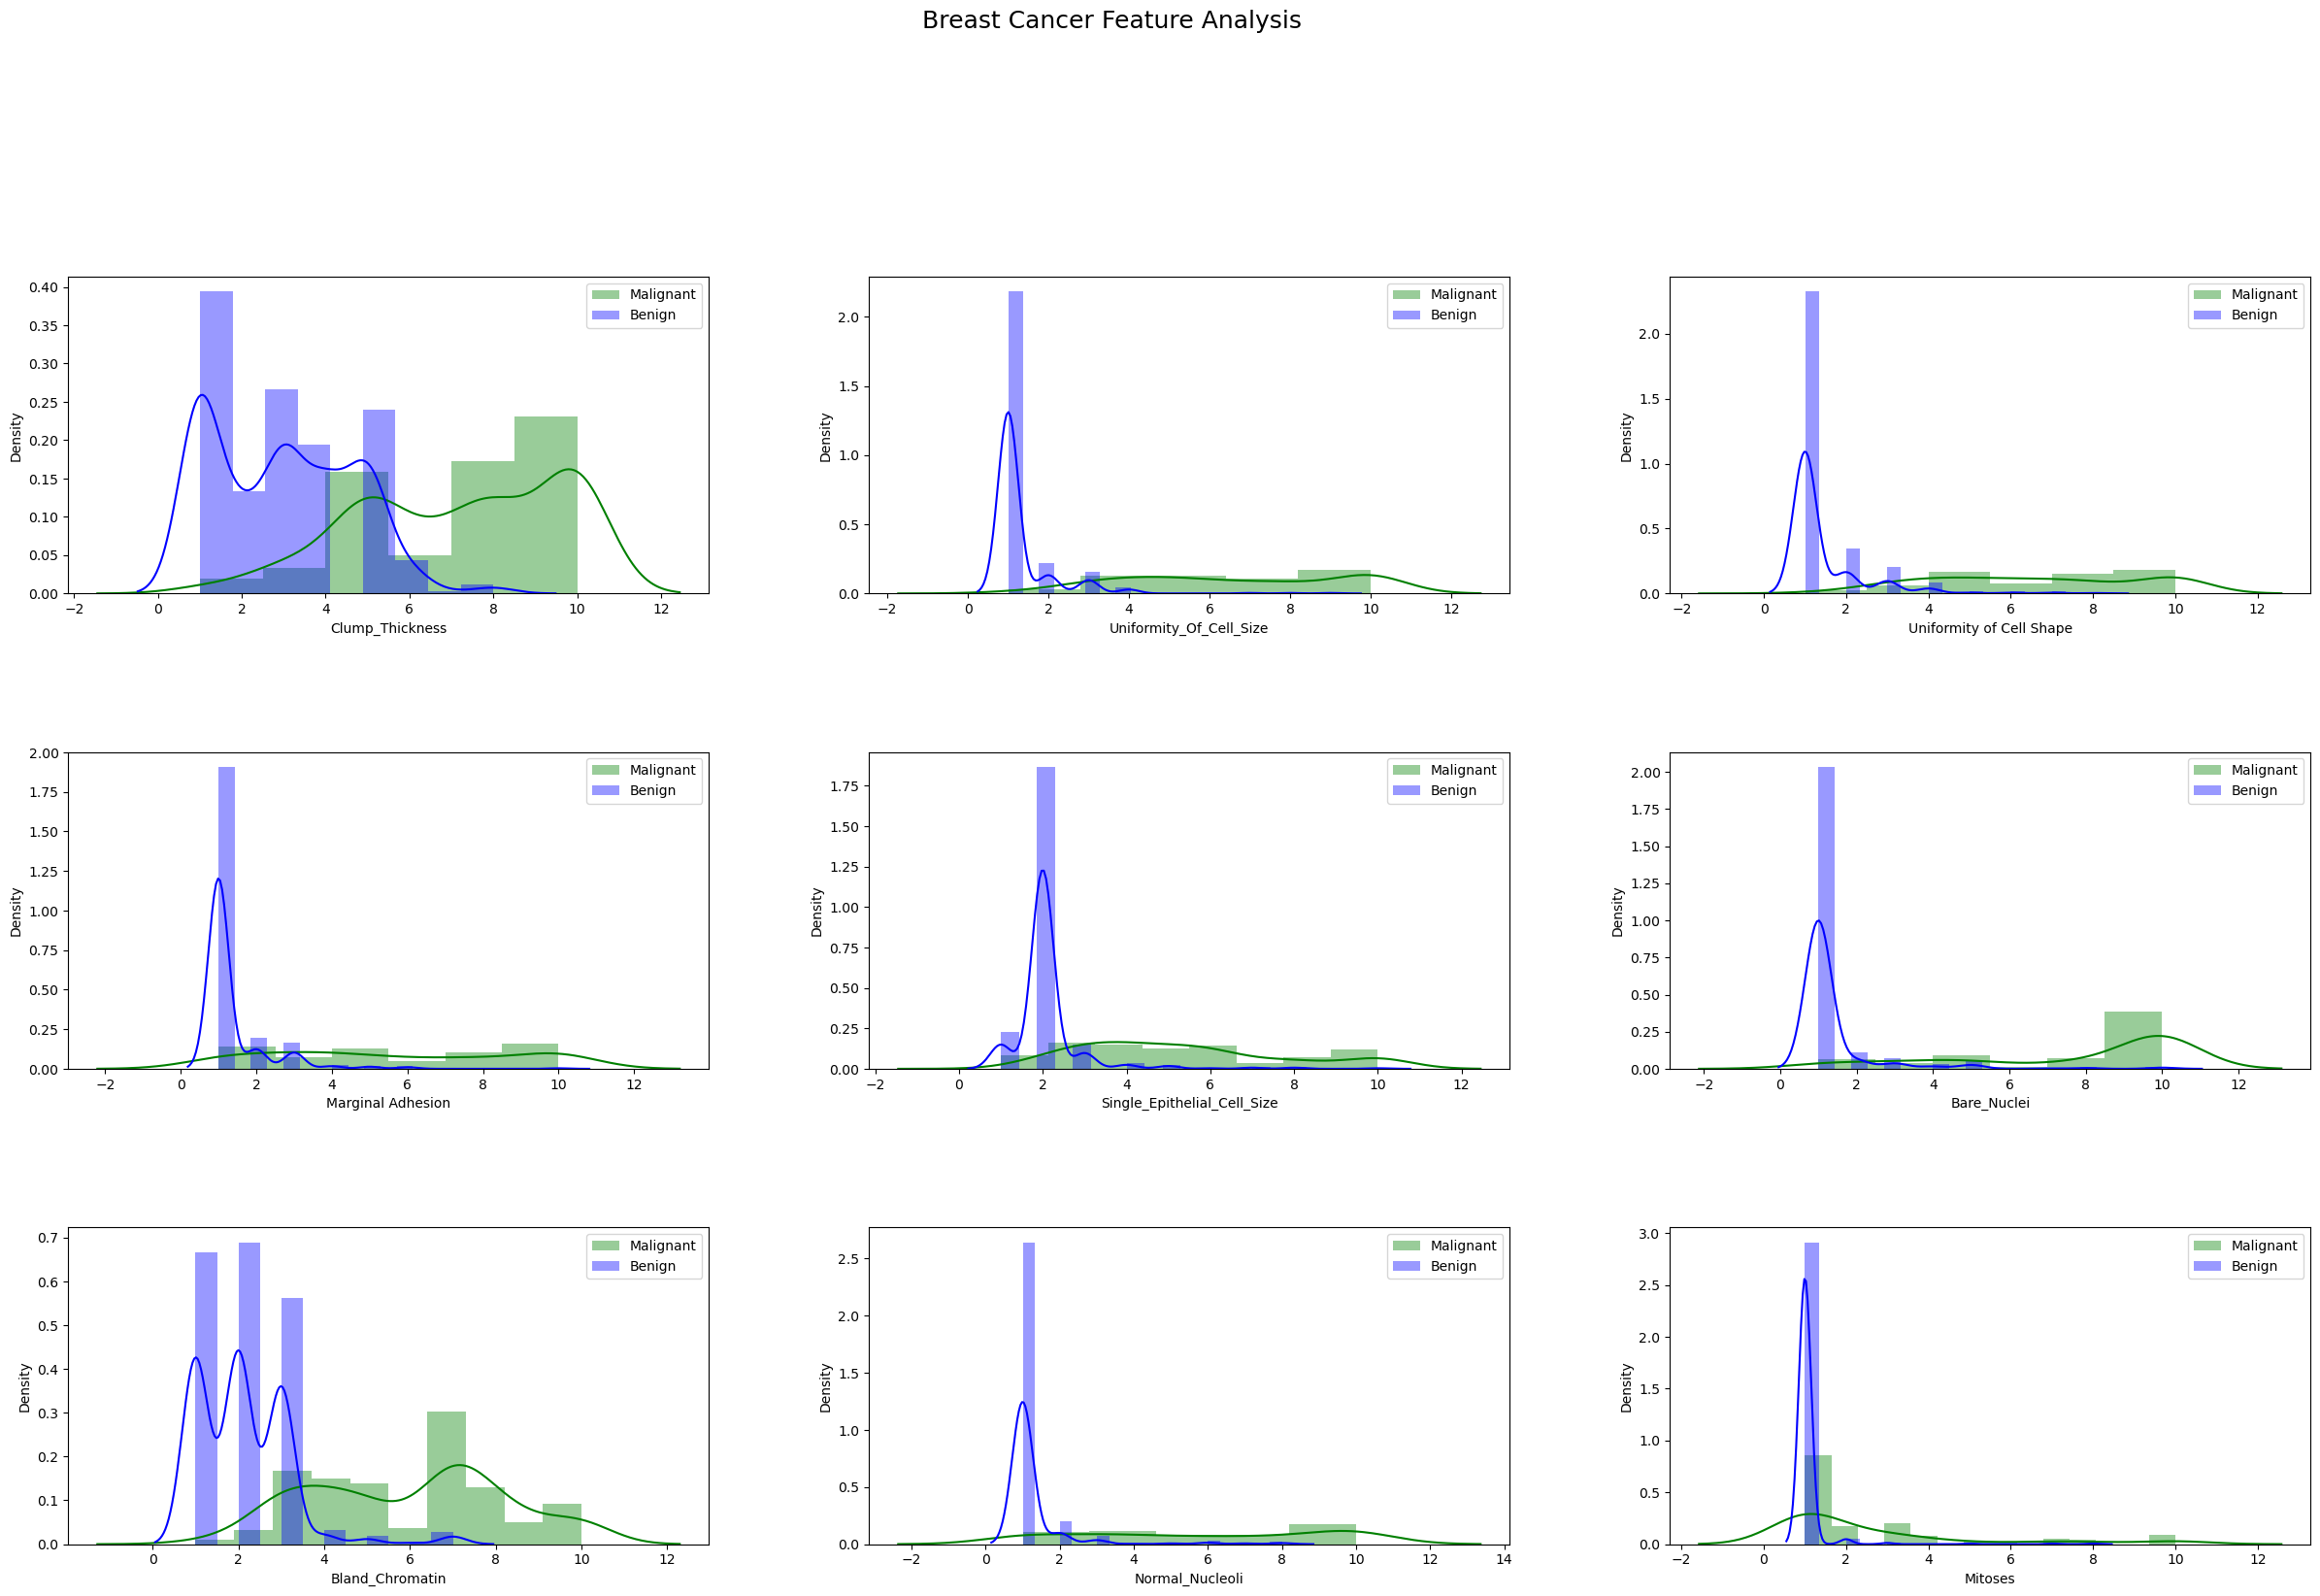

In [ ]:
# Figures for data analysis

df_fig = plt.figure(figsize=(25, 25),num=1)
d_class = df.iloc[:, -1]
df_features = df.iloc[:, 0:-1]
i = 0
for feature in df_features.columns:
    plt.subplot(5, 3, i + 1)
    i = i + 1
    sns.distplot(df_features[feature][d_class == 1], color='green', label='Malignant')
    sns.distplot(df_features[feature][d_class == 0], color='blue', label='Benign')
    plt.legend()
df_fig.tight_layout()
plt.subplots_adjust(left=0.07, bottom=None, right=None, top=0.92, \
    wspace=0.25, hspace=0.50)
df_fig.suptitle('Breast Cancer Feature Analysis', y=1.03, fontsize=18)
plt.show()

In [ ]:
cor_matrix = df.corr()
(cor_matrix)

,Clump_Thickness,Uniformity_Of_Cell_Size,Uniformity of Cell Shape,Marginal Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Clump_Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity_Of_Cell_Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single_Epithelial_Cell_Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare_Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal_Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


In [ ]:
upper_tri_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri_matrix)

                             Clump_Thickness  Uniformity_Of_Cell_Size  \
Clump_Thickness                          NaN                 0.642481   
Uniformity_Of_Cell_Size                  NaN                      NaN   
Uniformity of Cell Shape                 NaN                      NaN   
Marginal Adhesion                        NaN                      NaN   
Single_Epithelial_Cell_Size              NaN                      NaN   
Bare_Nuclei                              NaN                      NaN   
Bland_Chromatin                          NaN                      NaN   
Normal_Nucleoli                          NaN                      NaN   
Mitoses                                  NaN                      NaN   
Class                                    NaN                      NaN   

                             Uniformity of Cell Shape  Marginal Adhesion  \
Clump_Thickness                              0.653470           0.487829   
Uniformity_Of_Cell_Size                     

In [ ]:
# Drop highly dependent columns
to_drop = [column for column in upper_tri_matrix.columns if any(upper_tri_matrix[column] > 0.90)]
print(to_drop)

['Uniformity of Cell Shape']


In [ ]:
df = df.drop(df[to_drop], axis=1)

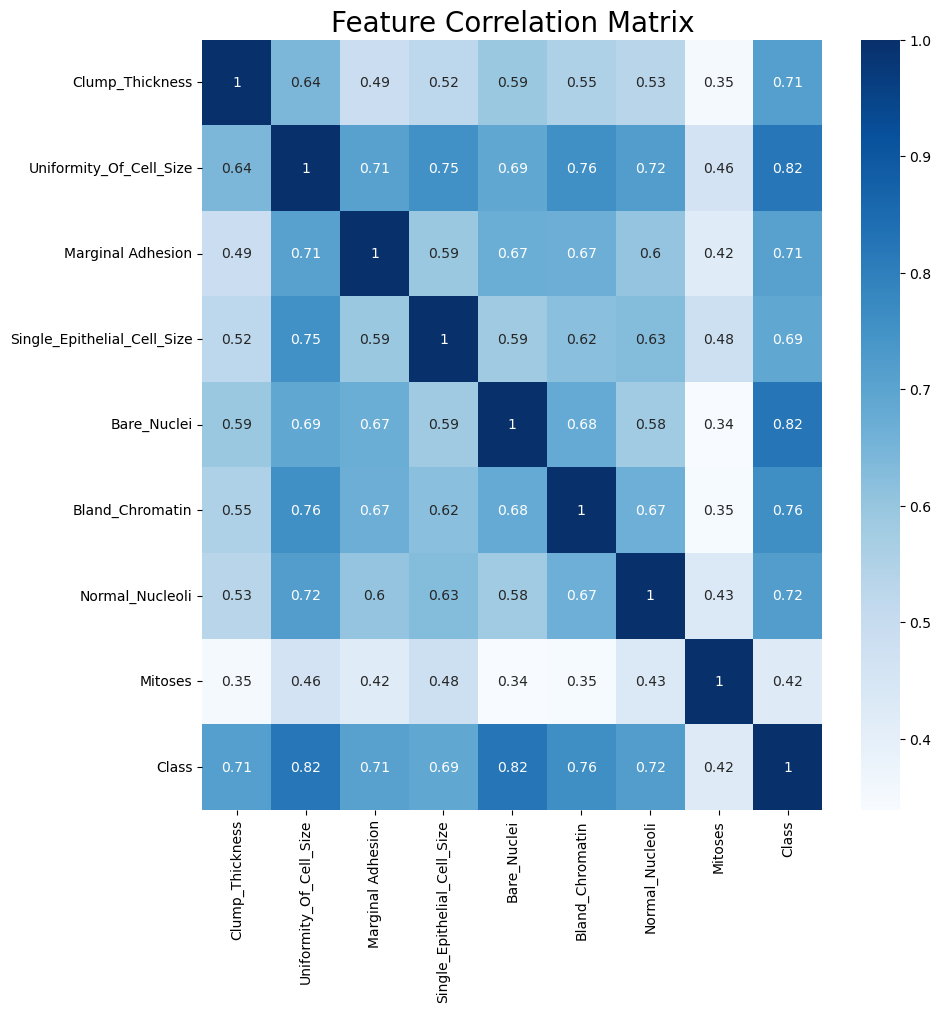

In [ ]:
# Correlation matrix

plt.figure(figsize=(10, 10),num=2)
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
print(df.dtypes)

Clump_Thickness                int64
Uniformity_Of_Cell_Size        int64
Marginal Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int32
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


In [ ]:
# shuffle & split data (80/20 split)
shuffle_df = df.sample(frac=1)
train_size = int(0.8 * len(df))
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

y_train = train_set[['Class']].copy()
y_train_test = train_set[['Class']].copy()


y_test = test_set[['Class']].copy()

x_train = train_set.copy()
x_test = test_set.copy()
x_train.drop("Class", axis=1, inplace=True)
x_test.drop("Class", axis=1, inplace=True)

# Standardized  the features
x_train = x_train.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
x_test = x_test.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

In [ ]:
# Logistic Regression Model

weights = np.zeros((df.shape[1], 1))
y_train = y_train.to_numpy().T[0]
y_test = y_test.to_numpy().T[0]

class LogisticRegression:
    
    # define sigmoid function
    def sigmoid(self, z):
        return 1 / (1 + e ** (-z))
    
    # define cost function
    def cost_function(self, X, y, weight):
        z = dot(X, weight)
        predict_p = y * log(self.sigmoid(z))
        predict_n = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_p + predict_n) / len(X)
    
    # define fit function
    def fit(self, X, y, loops, lr):
        loss = []
        weight = rand(X.shape[1])
        N = len(X)

        for _ in range(loops):
            # Gradient Descent
            y_pred = self.sigmoid(dot(X, weight))
            weight -= lr * dot(X.T, y_pred - y) / N
            # Saving Progress
            loss.append(self.cost_function(X, y, weight))

        self.weight = weight
        self.loss = loss
    
    # Predicted results, with a threshold of 0.5
    def predict(self, X):
        # Predictt with sigmoid function
        z = dot(X, self.weight)
        r = [] 
        for i in self.sigmoid(z):
            if i > 0.5:
                r.append(1)
            else:
                r.append(0)       
        return r,self.sigmoid(z)
    
    
    def get_roc(self,X,y_test):
        # get ROC points
        thresholds = list(np.array(list(range(0, 106, 1))) / 100)
        roc_value = []
        
        for threshold in thresholds:
            
            TP, TN, FN, FP = 0,0,0,0
        
            for i in range(len(y_test)):
                if X[i] >= threshold:
                    prediction_class = 1
                else:
                    prediction_class = 0
        
                if prediction_class == 1 and y_test[i] == 1:
                    TP += 1 
                elif y_test[i] == 1 and prediction_class == 0:
                    FN += 1
                elif y_test[i] == 0 and prediction_class == 1:
                    FP += 1
                elif y_test[i] == 0 and prediction_class == 0:
                    TN += 1
        
            TPR = TP / (TP + FN)
            FPR = FP / (TN + FP)
        
            roc_value.append([TPR, FPR])
        
        roc_threshold = pd.DataFrame(roc_value, columns=["TPR", "FPR"])
        roc_threshold["threshold"] = thresholds
        
        return roc_threshold
  

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train, loops=10000, lr=0.005)
y_pred,y_nonb_pred = logreg.predict(x_test)
#print(y_nonb_pred)
roc_threshold = logreg.get_roc(y_nonb_pred,y_test)
#print(roc_threshold)

In [ ]:
# # (2 for benign, 4 for malignant)
# # (0 for benign, 1 for malignant)

# import math
# from collections import Counter

# class NaiveBayes:
    
#     def fit(self, x_train, y_train):
#         ### Compute Priors probalities 
#         benign_count = np.count_nonzero(y_train == 0)     #neg_
#         malignant_count = np.count_nonzero(y_train == 1)
#         total_count = benign_count + malignant_count
#         benign_prob = benign_count/total_count           #neg_prior
#         malignant_prob = malignant_count/total_count     #pos_prior

#         ### Compute likelihoods
#         list_feature_class = []

        
#         # Create a tuple that contains (column/feature #, value, class) and add it to a list
#         for (row,col), value in np.ndenumerate(x_train):
#             feature_class = (col, value, y_train[row])
#             list_feature_class.append(feature_class)
#         # Get the counts for each feature-value-class tuple
#         dict_counts = Counter(list_feature_class)

        
#         # Convert to data frame to make accessing elements easier 
#         df_counts = pd.DataFrame(dict_counts.items())
#         df_keys = pd.DataFrame(list(dict_counts))

#         # Concat the keys and values into one dataframe
#         df = pd.concat([df_keys,df_counts[1]], axis = 1)
#         df.columns = [ 'featureNum', 'value', 'class','counts' ]


#         # Loop through each row and compute the likelihood and store in another array
#         likelihoods = []
#         for row in df.itertuples(index=False):
#             # row[0] Column/Feature #
#             # row[1] Value 
#             # row[2] Class
#             # row[3] Count 

#             # If class is 0, divide count by neg class count 
#             if row[2] == 0:
#                 likelihoods.append(row[3]/benign_count)
#             # If class is 1, divide count by pos class count 
#             elif row[2] == 1:
#                 likelihoods.append(row[3]/malignant_count)

#         # Add likelihoods column to dataframe 
#         df['likelihoods'] = likelihoods 

#         return df, benign_prob, malignant_prob
        
#     def predict(self, x_test, df_likelihoods, benign_prob, malignant_prob):

#         df_xtest = pd.DataFrame(x_test)
#         benign_likelihoods = []
#         malignant_likelihoods = []

#         for (row,col), value in np.ndenumerate(x_test):

#             #### Compute negative posterior prob
#             filt1 = df_likelihoods["featureNum"] == col
#             filt2 = df_likelihoods["value"] == value
#             filt3 = df_likelihoods["class"] == 0

#             # Find the row where the filters hold true
#             benign_likelihood_row = df_likelihoods.where(filt1 & filt2 & filt3)

#             # Select only the likelihood from the row
#             benign_likelihood = benign_likelihood_row["likelihoods"]

#             # Remove the other NaN values 
#             benign_likelihood.dropna(axis=0, inplace=True)

#             # If the likelihood value is not empty, then add to the likelihoods array
#             if benign_likelihood.values.size > 0:
#                 benign_likelihoods.append(benign_likelihood.values[0])
#             # If the likelihood value is empty, add a 1 to the array --> log(1) = 0
#             elif benign_likelihood.values.size == 0:
#                 benign_likelihoods.append(1)

#             #### Compute positive posterior prob
#             filt4 = df_likelihoods["class"] == 1

#             malignant_likelihood_row = df_likelihoods.where(filt1 & filt2 & filt4)
#             malignant_likelihood = malignant_likelihood_row["likelihoods"]
#             malignant_likelihood.dropna(axis=0, inplace=True)

#             # If the likelihood value is not empty, then add to the likelihoods array
#             if malignant_likelihood.values.size > 0:
#                 malignant_likelihoods.append(malignant_likelihood.values[0])
#             # If the likelihood value is empty, add a 1 to the array --> log(1) = 0
#             elif malignant_likelihood.values.size == 0:
#                 malignant_likelihoods.append(1)

#         # Reshape the likelihood array into the same size as x_test
#         malignant_likelihoods = np.reshape(malignant_likelihoods, x_test.shape)
#         benign_likelihoods = np.reshape(benign_likelihoods, x_test.shape)

#         #lambda func to take log of each element
#         log_likelihood = lambda x: np.log(x)

#         # negative and positive log likelihoods
#         benign_log_likelihoods = log_likelihood(benign_likelihoods)
#         malignant_log_likelihoods = log_likelihood(malignant_likelihoods)
#         sum_benign_loglike = np.sum(benign_log_likelihoods,axis=1)
#         sum_malignant_loglike = np.sum(malignant_log_likelihoods,axis=1)

#         # Compute neg and pos log posteriors
#         compute_benign_posterior = lambda x: (x + np.log(benign_prob))
#         compute_malignant_posterior = lambda x: (x + np.log(malignant_prob))

#         log_benign_posterior = compute_benign_posterior(sum_benign_loglike)
#         log_malignant_posterior = compute_malignant_posterior(sum_malignant_loglike)

#         # Get the posteriors
#         benign_posterior = np.exp(log_benign_posterior)
#         malignant_posterior = np.exp(log_malignant_posterior)

#         y_pred = []

#         for i in range(len(benign_posterior)):
#             if benign_posterior[i]>malignant_posterior[i]:
#                 y_pred.append(0)
#             else:
#                 y_pred.append(1)
#         return y_pred
        
    
    
    
#     def evaluate_acc(self, y, y_pred):
#         #Accuracy = (TP + TN)/ P + N
#         #Error Rate = (FP + FN)/P + N
#         #Precision = TP/RP 
#         #Recall = TP/P
        
#         A = (np.mean(y_pred == y))*100
#         #print(A)
        
#         #Alternatively
#         TP, TN, FN, FP = 0,0,0,0
#         print(y)
#         for i in range(len(y_pred)):
            
#             if (y[i] == y_pred[i]) & (y_pred[i] == 1):
#                 TP = TP + 1
#             if (y[i] != y_pred[i]) & (y_pred[i] == 1):
#                 FP = FP + 1
#             if (y[i] == y_pred[i]) & (y_pred[i] == 0):
#                 TN = TN + 1
#             if (y[i] != y_pred[i]) & (y_pred[i] == 0):
#                 FN = FN + 1
            
#         N = TN + FP
#         RP = TP + FP
#         RN = TN + FN
#         P = TP + FN
        
#         accuracy = ((TP + TN) / (P + N))*100
#         errorRate = ((FP + FN) / (P + N))*100
#         try:  
#             precision = (TP / (RP))*100
#         except:
#             print('Error: Divide by Zero')
#             precision = np.nan
#         try:
#             recall = (TP / (P))*100
#         except:
#             print('Error: Divide by Zero')
#             recall = np.nan


#         print("Accuracy: ", accuracy, "%")
#         print("Error Rate: ", errorRate, "%")
#         print("Precision: ", precision, "%")
#         print("Recall: ", recall, "% \n")
        
#         return A

In [ ]:
# # Implement a K-Fold Validation for Naive Bayes
# # Split the training set into K folds and determine the average accuracy
# def cross_validation_NB(model, x_train, y_train, K, random_shuffle = True):
#     # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
#     # x_train: input data
#     # y_train: target data
#     # K: Number of Folds to split the data
#     # num_steps: Number of steps of Gradient Descent before termination
#     # learning_rate: learning Rate of Gradient Descent
#     # min_error: Early Termination Requirement (Min imrovement in Cost Function)
#     # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
#     #Ramdomly shuffle the data
#     if random_shuffle:
#         data = np.concatenate((x_train, y_train), axis = 1)
#         np.random.shuffle(data)
#         x_train = np.array(data[:, :-1])
#         y_train = np.array(data[:, -1])
    
#     #Split into K folds
#     data_length = x_train.shape[0]
#     #print(data_length)
#     fold_size = int(math.floor(data_length/K))
#     #print(fold_size)
    
#     accuracy = 0
    
#     for i in range(K):
#         #Run through an iteration for a specific k-fold combination
#         Val_fold_start = i * fold_size
#         Val_fold_end = Val_fold_start + fold_size
        
#         x_val = x_train[Val_fold_start:Val_fold_end,:]
#         y_val = y_train[Val_fold_start:Val_fold_end]
#         #print("Validation Size")
#         #print(x_val.shape)
#         #print(y_val.shape)
            
#         x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
#         y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
#         #Training data for K Folds (Fit Function)
#         likelihoods, benign_prior, malignant_prior = model.fit(x_training, y_training)
        
        
#         #Cross Validation Fold (Predict Function)
#         y_pred = model.predict(x_val,likelihoods, benign_prior,malignant_prior)
        
#         #print(y_val)
#         #print(y_pred)
    
    
#         #Average Cross Validation Error over all instances
#         accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
#     avg_cross_validation_accuracy = accuracy / K
    
#     print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
#     return avg_cross_validation_accuracy

In [ ]:
# NB = NaiveBayes()
# cross_validation_NB(NB,x_train,y_train,K = 10)

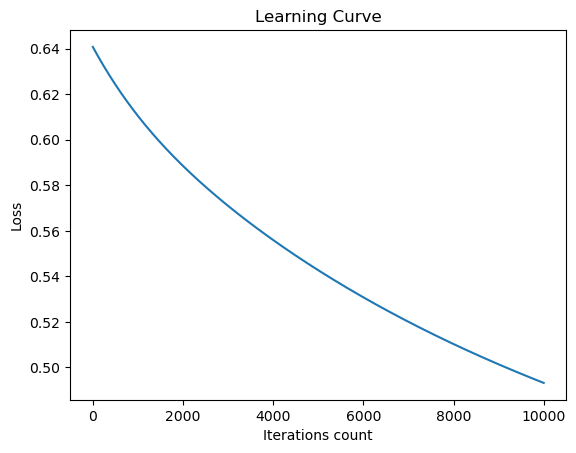

Pseudo R-square is: 0.422752808988764


In [ ]:
# Performance Measures

# loss function
plt.figure(3)
plt.plot(logreg.loss)
plt.title('Learning Curve')
plt.xlabel('Iterations count')
plt.ylabel('Loss')
plt.show()


# EPseudo R-squared for logistic regression
def pseudo_rsquare(x, y):
    n = len(x)
    sum_up = np.sum(np.power(x - y, 2))
    sum_down = np.sum(np.power((x - (np.sum(x) / n)), 2))
    return 1 - (sum_up / sum_down)


print(f"Pseudo R-square is: {pseudo_rsquare(y_test, y_pred)}")

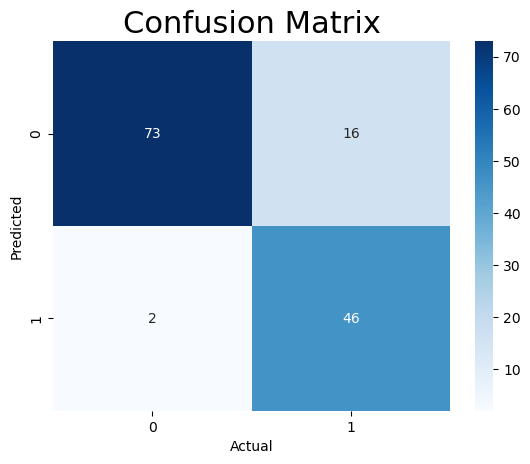

Test Accuracy: 86.86%


In [ ]:
# confusion matrix
y_pred = pd.Series(y_pred, name='Actual')
y_test = pd.Series(y_test, name='Predicted')

df_confusion = pd.crosstab(y_test, y_pred)

plt.figure(4)
sns.heatmap(df_confusion, annot=True,fmt='d', cmap='Blues')
#plt.tight_layout()
plt.title("Confusion Matrix", fontsize=22)
plt.savefig("./Confusion.jpg")
plt.show()

# test accuracy
accuracy = (len(y_test) - np.count_nonzero(y_test - y_pred)) / len(y_test)
print(f"Test Accuracy: {round(accuracy * 100, 2)}%")

In [ ]:
# Recall, precision and f1 scores

# compute TP\TN\FP\FN
TP = df_confusion[1][1]
TN = df_confusion[0][0]
FP = df_confusion[1][0]
FN = df_confusion[0][1]

print('df_confusion: ',df_confusion)

recall = TP / (TP + FN)
precision = TP / (TP + FP)
f1_score = 2 * ((recall * precision) / (recall + precision))
print('recall: ', recall)
print('precision: ', precision)
print('f1 score: ', f1_score)

df_confusion:  Actual      0   1
Predicted        
0          73  16
1           2  46
recall:  0.9583333333333334
precision:  0.7419354838709677
f1 score:  0.8363636363636364


In [ ]:
# ROC and AUC Verification result

# True positive and false negative rates
TPR = recall
TNR = TN / (TN + FP)
FNR = 1 - TNR

# AUC
auc_score = round(abs(np.trapz(roc_threshold.TPR, roc_threshold.FPR)), 3)
print('auc score: ', auc_score)

# ROC curve

fig = plt.figure(5)
plt.plot(roc_threshold.FPR, roc_threshold.TPR, label="ROC")
plt.plot([0, 1], linestyle='dashed', label="Random guess")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
fig.text(0.3, 0.5, 'AUC={0:.3f}'.format(auc_score), fontsize=12)
plt.title("ROC curve", fontsize=20)
plt.savefig("./roc.jpg")
plt.show()

In [ ]:
# Cross validation logistic regression K-fold methold

# shuffle & split data 
shuffle_df = df.sample(frac=1)
train_df = shuffle_df.iloc[:, 0:-1]  
test_df = shuffle_df.iloc[:, -1] 

k = 10
train_folds = np.array_split(train_df, k)
test_folds = np.array_split(test_df, k)

results = []

# splitting into train/test & iterate k times
for i in range(k):


    x_test = train_folds[i]
    y_test = test_folds[i]
    x_train = train_df.drop(x_test.index)
    y_train = test_df.drop(y_test.index)

    x_train = x_train.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
    x_test = x_test.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

    logreg_fold = LogisticRegression()
    logreg_fold.fit(x_train, y_train, loops=10000, lr=0.005)
    y_pred,y_nonb_pred = logreg_fold.predict(x_test)

    accuracy = abs((len(y_test) - np.count_nonzero(y_test - y_pred)) / len(y_test))
    results.append(accuracy)

    if i == k - 1:
        print(f"Test Accuracy for {k}-fold: {round(np.mean(results) * 100, 2)}%")

Test Accuracy for 10-fold: 87.12%
